In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [27]:
# Paso 1: Preparar los datos de entrenamiento
# Datos de kilómetros
kilometros = np.array([1, 2, 3, 4, 5, 10, 15, 20, 50, 100], dtype=float)
# Datos de millas (1 km = 0.621371 millas)
millas = np.array([0.621371, 1.242742, 1.864113, 2.485484, 3.106855,
                           6.21371, 9.320565, 12.42742, 31.06855, 62.1371], dtype=float)

In [28]:
# Paso 2: Crear el modelo de la red neuronal
model = keras.Sequential([
    layers.Dense(units=10, input_dim=1, activation='relu'),  # Capa oculta con 8 neuronas
    layers.Dense(units=1)  # Capa de salida con 1 neurona (predicción de millas)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Paso 3: Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Paso 4: Entrenar el modelo
model.fit(kilometros, millas, epochs=500, verbose=0)  # Entrenamos con 250 épocas

In [31]:
# Paso 5: Realizar una predicción
kilometros_prueba = np.array([10, 25, 50, 75, 150], dtype=float)
predicciones = model.predict(kilometros_prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [32]:
# Paso 6: Mostrar los resultados de las predicciones
for km, mi in zip(kilometros_prueba, predicciones):
    print(f"{km} kilómetros son aproximadamente {mi[0]:.2f} millas.")

10.0 kilómetros son aproximadamente 5.35 millas.
25.0 kilómetros son aproximadamente 12.24 millas.
50.0 kilómetros son aproximadamente 23.74 millas.
75.0 kilómetros son aproximadamente 35.23 millas.
150.0 kilómetros son aproximadamente 69.71 millas.


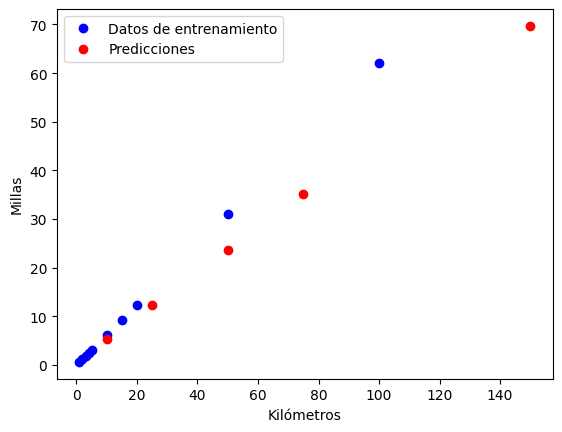

In [33]:
# Paso 7: Graficar los resultados
plt.plot(kilometros, millas, 'bo', label='Datos de entrenamiento')
plt.plot(kilometros_prueba, predicciones, 'ro', label='Predicciones')
plt.xlabel('Kilómetros')
plt.ylabel('Millas')
plt.legend()
plt.show()

In [36]:
# Paso 8: Ingreso de número de kilómetros desde el teclado
Kilom = float(input("Ingresa el número de kilómetros para convertir a millas: "))

# Predicción con el valor ingresado por el usuario
millasp = model.predict(np.array([Kilom], dtype=float))

# Mostrar el resultado
print(f"{Kilom} kilómetros son aproximadamente {millasp[0][0]:.2f} millas.")

Ingresa el número de kilómetros para convertir a millas: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
25.0 kilómetros son aproximadamente 12.24 millas.
